## What we're going to cover

* Getting a custom dataset with PyTorch
* Becoming one with the data (preparing and visualising)
* Transforming data foe use with a model
* Loading custom data with pre-built functions and custom functions
* Building FoodVision Mini to classify Food Images
* Comparing models with and without data augmentation
* Making predictions on custom data

## 0. Importing PyTorch and setting up device agnostic code


In [ ]:
import torch
from torch import nn

torch.__version__

'2.5.0+cu121'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Sun Nov  3 14:51:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 1. Get data

Our dataset is a subset of Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 train, 250 test).

Our dataset starts with 3 classes of food and 10% of tge images per class (75 train, 25 test).

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("/data")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")

else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


    # Download pizza, steak and sushi
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
      request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
      print("Downloading pizza, steak, sushi data...")
      f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find /data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## 2. Becoming one with the data (Data prep and exploration)


In [ ]:
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in '/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in '/data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in '/data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in '/data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in '/data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in '/data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in '/data/pizza_steak_sushi/train/pizza'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/data/pizza_steak_sushi/train'),
 PosixPath('/data/pizza_steak_sushi/test'))

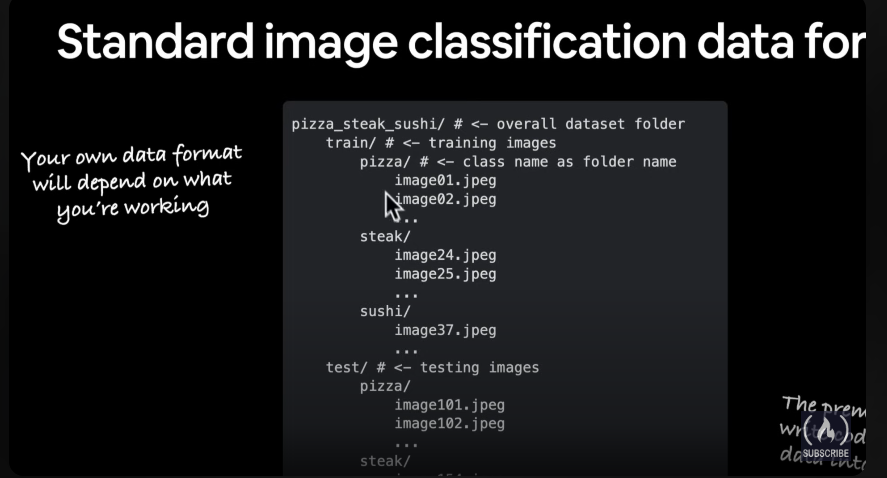

In [ ]:
## 2.1 Visualizing